In [1]:
import os
os.environ["PYTHONWARNINGS"] = "ignore"

from sklearn.datasets import make_moons, make_circles

from select_feature_types import *

In [33]:
X, y = make_moons(n_samples=500, shuffle=True, noise=0.3, random_state=123)

In [8]:
preprocessed_X = preprocess(X)

In [10]:
feature_matrix = pd.DataFrame(
    {"f0": preprocessed_X[:, 0], "f1": preprocessed_X[:, 1], "label": y}
)

Text(0.5, -0.1, 'Visualization of the preprocessed dataset.')

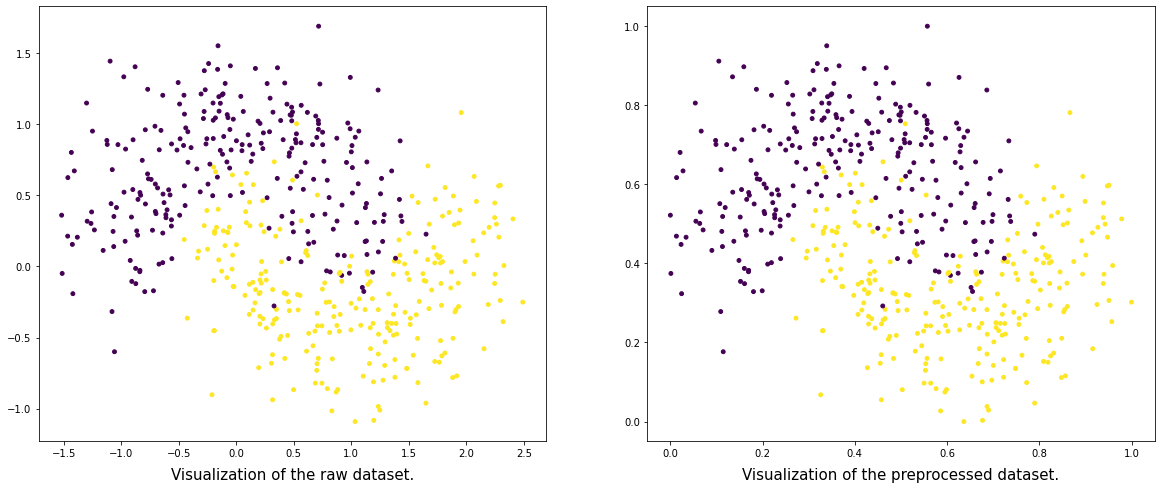

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs[0].scatter(X[:, 0], X[:, 1], c=y, s=15, cmap="viridis")
axs[0].set_title("Visualization of the raw dataset.", y=-0.1, fontsize=15)

axs[1].scatter(
    feature_matrix["f0"],
    feature_matrix["f1"],
    marker="o",
    s=15,
    c=feature_matrix["label"],
    cmap="viridis",
)
axs[1].set_title("Visualization of the preprocessed dataset.", y=-0.1, fontsize=15)

In [13]:
train_X, train_y, test_X, test_y = prepare_train_test_data(
    feature_matrix, ["f0", "f1"], test_ratio=0.2, random_state=123
)

In [15]:
classifier, accuracy, feature_importance = train(
    train_X, train_y, test_X, test_y, model_type=ModelType.SVM, metrics=Metrics.Accuracy, display_cv_results=True
)

Best parameters selected: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Support vectors: [[0.73799631 0.50613408]
 [0.6259615  0.87053217]
 [0.73401527 0.70991949]
 [0.54396679 0.52123095]
 [0.47760932 0.51915942]
 [0.79027533 0.47395767]
 [0.73571459 0.52007747]
 [0.30052779 0.58096265]
 [0.66087868 0.45693567]
 [0.68687062 0.42898794]
 [0.58248676 0.37844284]
 [0.66211234 0.42256303]
 [0.43636197 0.69044156]
 [0.41450707 0.6765027 ]
 [0.23902438 0.4120493 ]
 [0.62402277 0.37527035]
 [0.65523604 0.32906588]
 [0.41106868 0.65813768]
 [0.50256757 0.47984792]
 [0.35838077 0.65670829]
 [0.53384613 0.48089069]
 [0.44983204 0.48906508]
 [0.65203261 0.33920539]
 [0.39211879 0.57946309]
 [0.52410398 0.58739286]
 [0.55727341 1.        ]
 [0.67452026 0.3778425 ]
 [0.36435739 0.6411484 ]
 [0.2191829  0.40191653]
 [0.49578194 0.59018253]
 [0.36580624 0.57146363]
 [0.72409603 0.41312646]
 [0.61285604 0.4198004 ]
 [0.49970357 0.5014152 ]
 [0.59863138 0.42113363]
 [0.73250787 0.56182985]
 [0.31735932

Accuracy on the test set: 0.91
Feature's importance: [('f1', 0.26), ('f0', 0.19200000000000003)]


/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


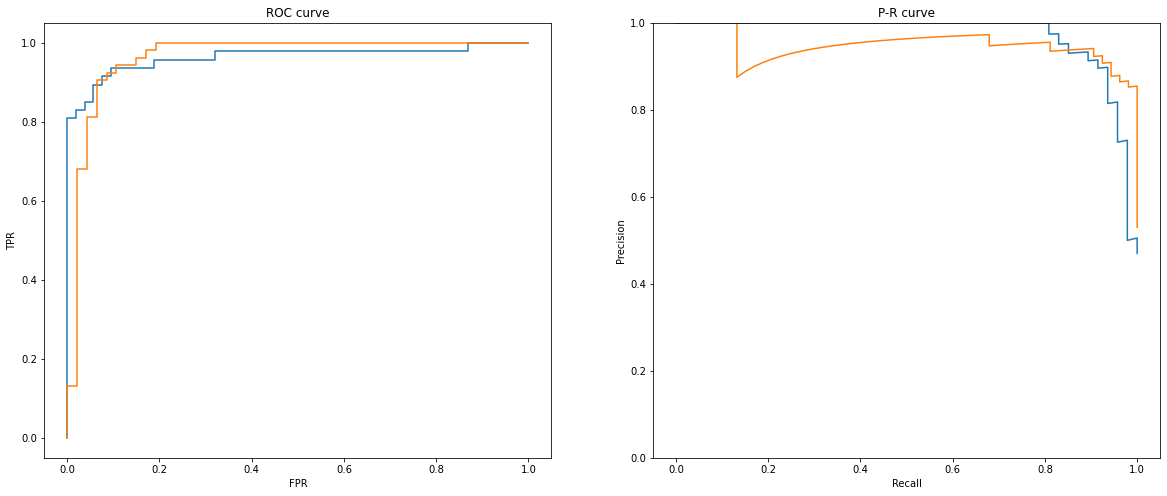

In [34]:
# Display model's performance.
print('Accuracy on the test set:', accuracy)
print("Feature's importance:", feature_importance)

# Plot ROC curve.
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.ylim(0, 1)
plot_performance(classifier, test_X.values, test_y, pos_label=0, ax=axs[0])
plot_performance(classifier, test_X.values, test_y, pos_label=1, ax=axs[0])

# Plot P-R curve
plot_performance(classifier, test_X.values, test_y, pos_label=0, ax=axs[1], roc=False)
plot_performance(classifier, test_X.values, test_y, pos_label=1, ax=axs[1], roc=False)

Text(0.5, -0.1, "Visualization of test set with model's prediction.")

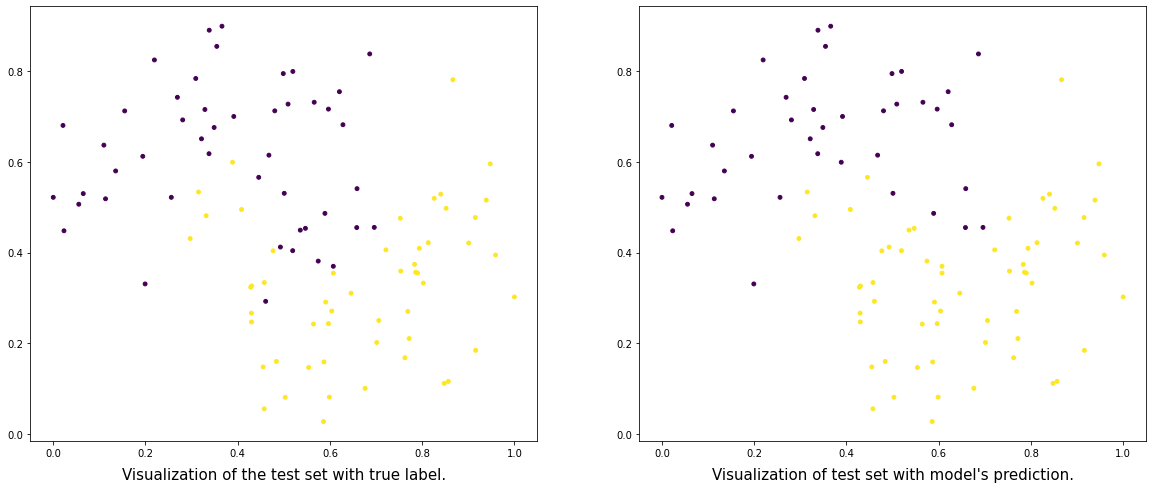

In [35]:
# Visualize the prediction.
predict_y = classifier.predict(test_X)
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs[0].scatter(test_X.iloc[:, 0], test_X.iloc[:, 1], c=test_y, s=15, cmap="viridis")
axs[0].set_title("Visualization of the test set with true label.", y=-0.1, fontsize=15)

axs[1].scatter(
    test_X.iloc[:, 0], test_X.iloc[:, 1], marker="o", s=15, c=predict_y, cmap="viridis",
)
axs[1].set_title(
    "Visualization of test set with model's prediction.", y=-0.1, fontsize=15
)

Training SVM :
Best parameters selected: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Support vectors: [[0.73799631 0.50613408]
 [0.6259615  0.87053217]
 [0.73401527 0.70991949]
 [0.54396679 0.52123095]
 [0.47760932 0.51915942]
 [0.79027533 0.47395767]
 [0.73571459 0.52007747]
 [0.30052779 0.58096265]
 [0.66087868 0.45693567]
 [0.68687062 0.42898794]
 [0.58248676 0.37844284]
 [0.66211234 0.42256303]
 [0.43636197 0.69044156]
 [0.41450707 0.6765027 ]
 [0.23902438 0.4120493 ]
 [0.62402277 0.37527035]
 [0.65523604 0.32906588]
 [0.41106868 0.65813768]
 [0.50256757 0.47984792]
 [0.35838077 0.65670829]
 [0.53384613 0.48089069]
 [0.44983204 0.48906508]
 [0.65203261 0.33920539]
 [0.39211879 0.57946309]
 [0.52410398 0.58739286]
 [0.55727341 1.        ]
 [0.67452026 0.3778425 ]
 [0.36435739 0.6411484 ]
 [0.2191829  0.40191653]
 [0.49578194 0.59018253]
 [0.36580624 0.57146363]
 [0.72409603 0.41312646]
 [0.61285604 0.4198004 ]
 [0.49970357 0.5014152 ]
 [0.59863138 0.42113363]
 [0.73250787 0.5618298

/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Best parameters selected: {'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 80}
Feature importances: [0.47510946772694773, 0.5248905322730523]
Train score: [1.04022238e+00 8.07363572e-01 6.40280816e-01 5.13487743e-01
 4.15968782e-01 3.37243388e-01 2.75035685e-01 2.24054816e-01
 1.83173084e-01 1.50400080e-01 1.23330419e-01 1.01259884e-01
 8.35124179e-02 6.91967047e-02 5.72774838e-02 4.73627291e-02
 3.90717269e-02 3.23914080e-02 2.68240667e-02 2.21662836e-02
 1.84357150e-02 1.53477190e-02 1.27784495e-02 1.06266078e-02
 8.83316425e-03 7.36505708e-03 6.16436749e-03 5.15633620e-03
 4.31296860e-03 3.65179402e-03 3.07730983e-03 2.57397839e-03
 2.17935284e-03 1.79669721e-03 1.49885212e-03 1.24298253e-03
 1.03526157e-03 8.66841567e-04 7.23709982e-04 6.08935823e-04
 5.10621775e-04 4.23748025e-04 3.58462362e-04 3.04519055e-04
 2.60724814e-04 2.24769315e-04 1.92480689e-04 1.66194132e-04
 1.43679922e-04 1.24371410e-04 1.07634477

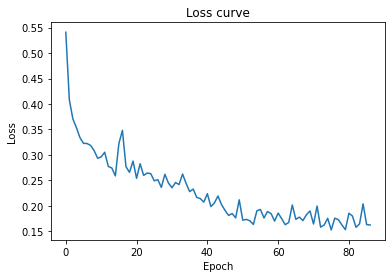

In [36]:
# Select the best model
models_performance = []
for model_type in ModelType:
    print("Training %s :" % model_type.value)
    classifier, accuracy, feature_importance = train(
        train_X,
        train_y,
        test_X,
        test_y,
        model_type=model_type,
        metrics=Metrics.Accuracy,
        n_jobs=20,
    )
    models_performance.append((model_type.value, accuracy))

models_performance.sort(key=lambda t: t[1], reverse=True)
print("Best model type:", models_performance[0][0])
print("Performance of the best model type:", models_performance[0][1])

In [ ]:
# Visualize the models' performance.
fig = plt.figure(figsize=(20, 8))
model_types, performance = zip(*models_performance)

plt.bar(model_types, performance, width=0.5)
plt.ylabel("Accuracy", size=20)
plt.ylim(0.8, 1)
plt.xlabel("Model type", size=20)
plt.xticks(size=15)